In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


# Thông tin sinh viên

Họ tên: Phan Anh Lộc

MSSV: 19521766

Bài thực hành số 5

# Import các thư viện

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import os

# Đường dẫn môn học

In [ ]:
dir_monhoc = '/gdrive/MyDrive/CS231.M12.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap','Baitap5')
dir_img = os.path.join(dir_baitap, 'images')

# ĐỌC ẢNH

In [94]:
messi_path = os.path.join(dir_img,'Lionel-Messi.jpg')
messi = cv.imread(messi_path)
airplane_path = os.path.join(dir_img, 'airplane.jpg')
airplane = cv.imread(airplane_path)
camourflage160_path = os.path.join(dir_img,'camourflage_00160.jpg')
camourflage160 = cv.imread(camourflage160_path)
camourflage018_path = os.path.join(dir_img,'camourflage_00018.jpg')
camourflage018 = cv.imread(camourflage018_path)

In [83]:
def GraphSeg(img, x, y, w, h):
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  imgcopy=img.copy()
  imgcopy=cv.rectangle(imgcopy,(x,y),(x+w,y+h),(0,255,0),3)
  plt.imshow(imgcopy)
  plt.show()
  print(img.shape)

  mask = np.zeros(img.shape[:2], np.uint8)
  backgroundModel = np.zeros((1, 65), np.float64)
  foregroundModel = np.zeros((1, 65), np.float64)
  rectangle = (x, y, w, h)
  cv.grabCut(img, mask, rectangle,
  backgroundModel, foregroundModel,5, cv.GC_INIT_WITH_RECT)

  mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  res = img * mask2[:, :, np.newaxis]
  plt.imshow(res)
  plt.show()
  res = cv.cvtColor(res, cv.COLOR_BGR2RGB)

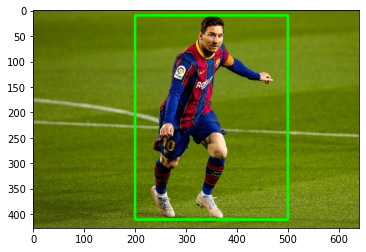

(427, 640, 3)


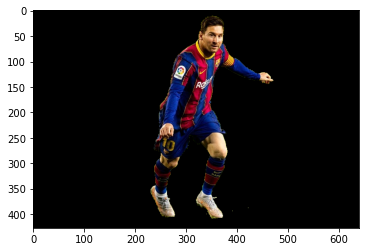

In [84]:
GraphSeg(messi,200,10,300,400)

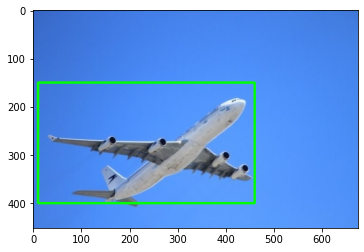

(452, 675, 3)


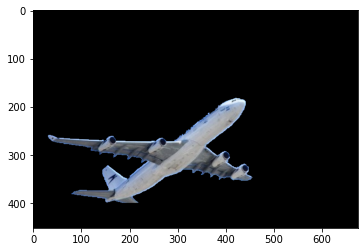

In [85]:
GraphSeg(airplane, 10, 150, 450, 250)

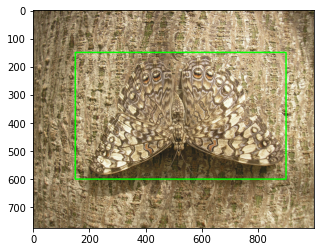

(774, 1000, 3)


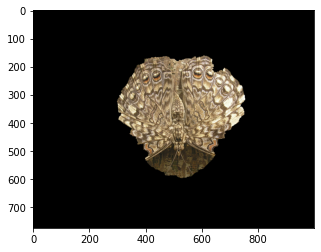

In [92]:
GraphSeg(camourflage160, 150, 150, 750, 450)

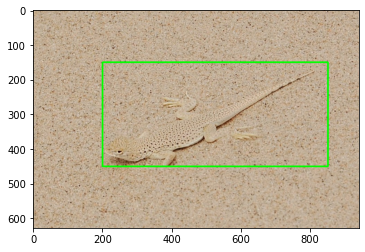

(628, 940, 3)


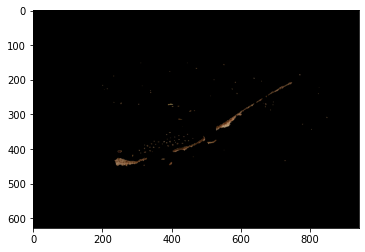

In [95]:
GraphSeg(camourflage018, 200, 150, 650, 300)